Имеется набор данных о характеристиках большого числа рыб. Цель: по размерам рыбы и её виду предсказать массу рыбы. Будем использовать алгоритм линейной регрессии.

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/iillyya/python_project_fish_market/main/Fish.csv')

In [94]:
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
69,Parkki,200.0,21.2,23.0,25.8,10.3458,3.6636
48,Roach,169.0,22.0,24.0,27.2,7.5344,3.8352
84,Perch,125.0,19.0,21.0,22.5,5.6925,3.6675
52,Roach,290.0,24.0,26.0,29.2,8.8768,4.4968
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [96]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [97]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:ylabel='Density'>

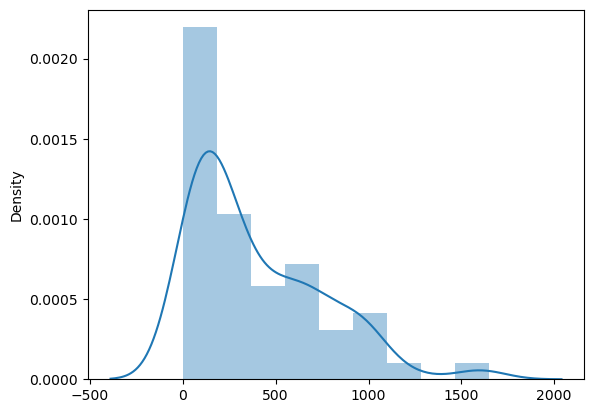

In [98]:
sns.distplot(df[['Weight']])

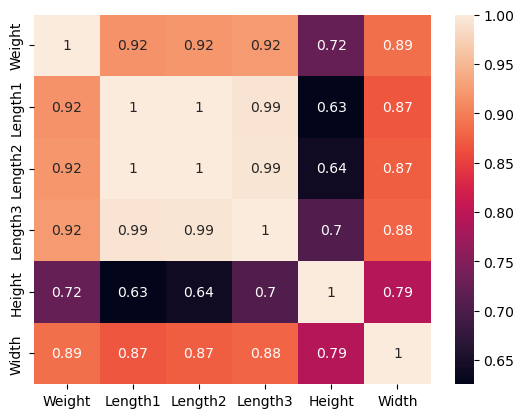

In [99]:
plt.figure()
sns.heatmap(df.corr(), annot=True)

plt.show()

In [100]:
X = df.drop(columns=['Weight'])
y = df['Weight']

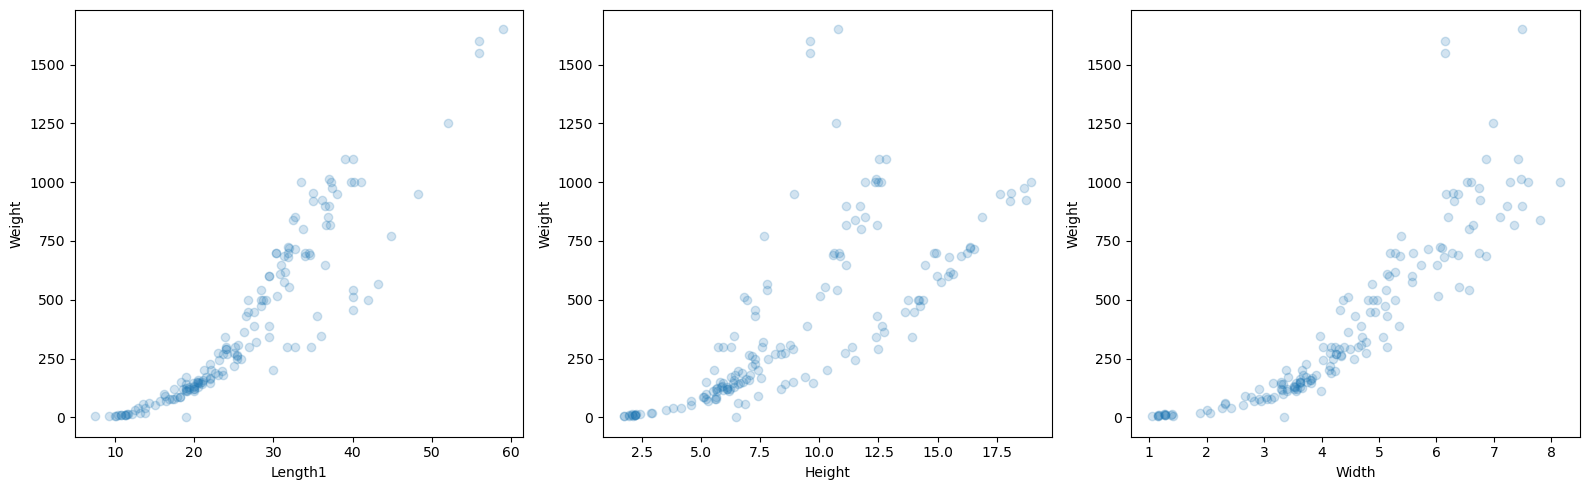

In [101]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(["Length1", "Height", "Width"]):
    axs[i].scatter(X[feature], y, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Weight")
plt.tight_layout()

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [103]:
print(f'Размеры обучающей выборки: {X_train.shape}', f'Размеры тестовой выборки: {X_test.shape}',sep='\n')

Размеры обучающей выборки: (127, 6)
Размеры тестовой выборки: (32, 6)


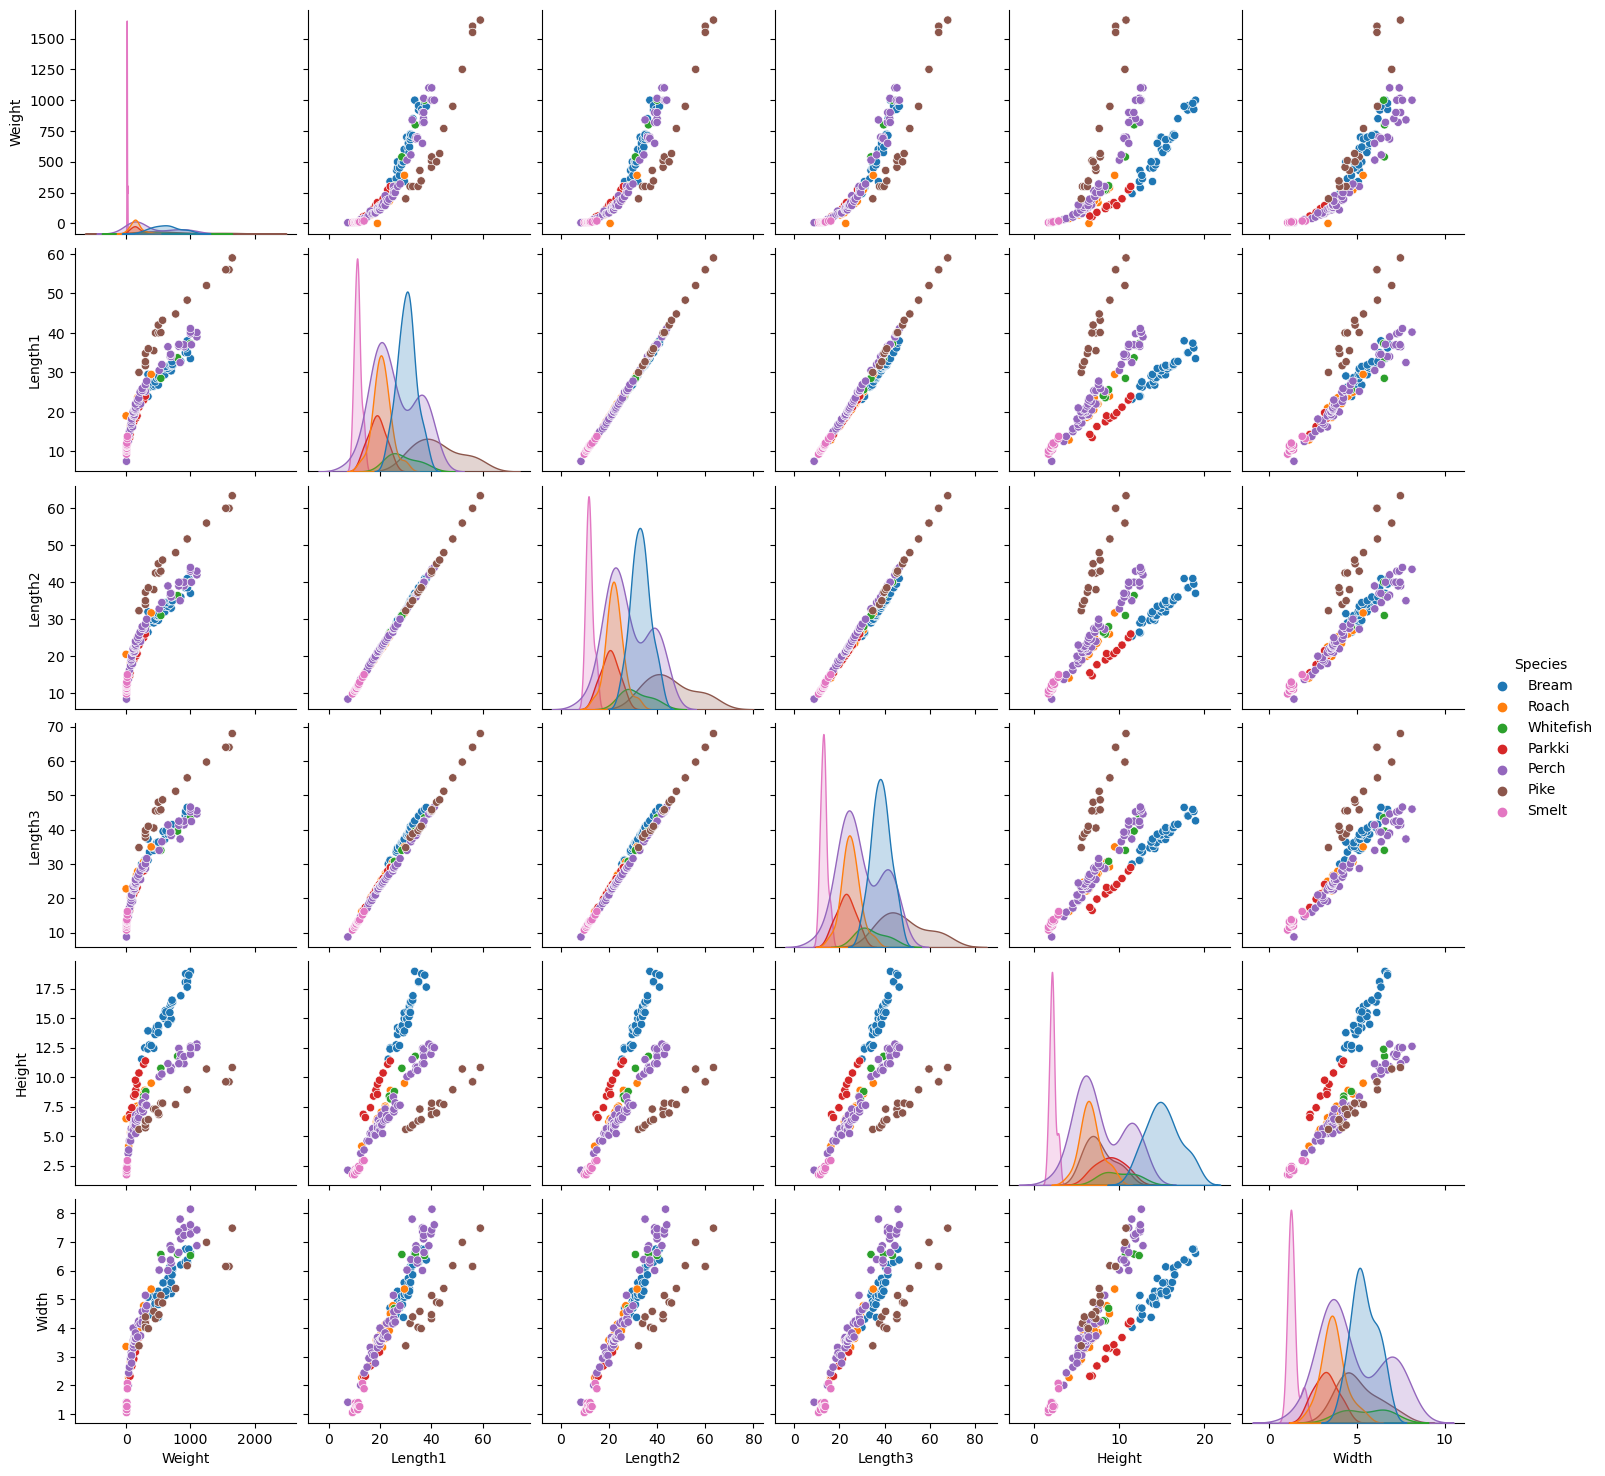

In [104]:
sns.pairplot(df, kind='scatter', hue='Species')

In [105]:
numeric = list(X_test.drop(columns='Species').columns)
categorical = ['Species']
print(numeric)

['Length1', 'Length2', 'Length3', 'Height', 'Width']


In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', LinearRegression())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 82.1156


In [107]:
print(r2_score(y_test, y_pred))

0.8241603153034757


In [108]:
best_constant = y_train.mean()
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with best constant = 266.9119
Train RMSE with best constant = 378.3467


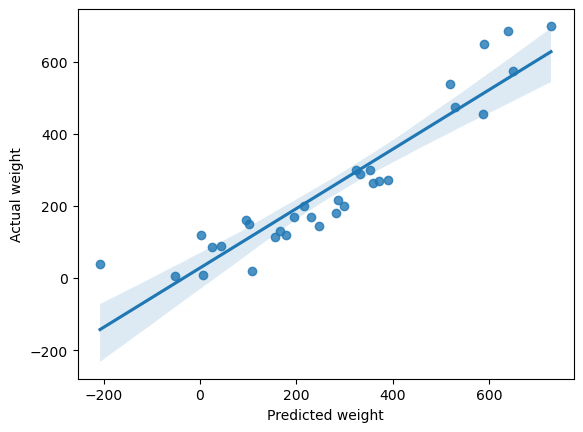

In [109]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted weight")
plt.ylabel('Actual weight')
plt.show()

In [110]:
randnums = np.random.randint(1,150,10)
for k,i in enumerate(randnums):
    print(f'{k+1}) Predicted weight: {float(model.predict(df.iloc[[i]]))}')
    print('   Actual weight: ', float(df.iloc[[i]]['Weight']))

1) Predicted weight: 992.1834160780363
   Actual weight:  1000.0
2) Predicted weight: 507.0103441466607
   Actual weight:  390.0
3) Predicted weight: 590.6884421203231
   Actual weight:  650.0
4) Predicted weight: 738.4573193608664
   Actual weight:  690.0
5) Predicted weight: 412.0364112114251
   Actual weight:  430.0
6) Predicted weight: 732.410615828429
   Actual weight:  800.0
7) Predicted weight: 601.6380275245951
   Actual weight:  700.0
8) Predicted weight: 650.1974035050841
   Actual weight:  575.0
9) Predicted weight: 510.1992924184051
   Actual weight:  500.0
10) Predicted weight: 497.970268332105
   Actual weight:  450.0
